<a href="https://colab.research.google.com/github/aerofa45/Simulation-of-my-paper/blob/main/Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------------
# 1. Define Universe X and parameter set E
# --------------------------------------------------------

# X consists of points in R^2 for simplicity
# E = {e1, e2}, parameters that modify the soft metric
E = ["e1", "e2"]
w = {"e1": 0.6, "e2": 0.4}   # soft weights for each parameter




In [2]:

# 2. Define Soft Sets A and B as in the paper


# We define normal sets A, B in R^2
A_points = np.array([[1.0, 1.5],
                     [1.2, 1.6],
                     [0.8, 1.4]])

B_points = np.array([[3.5, 3.0],
                     [3.7, 3.2],
                     [3.4, 2.8]])

# Soft sets F_A and F_B:
# For each parameter, we assign a subset of A or B
# (This mimics the structure in the paper)
F_A = {
    "e1": A_points,
    "e2": A_points + np.array([0.1, -0.05])  # small parameter-based deformation
}

F_B = {
    "e1": B_points,
    "e2": B_points + np.array([-0.05, 0.1])
}



In [3]:

# 3. Soft metric d_F(x,y) based on parameters and weights


def d_soft(x, y):
    """Soft metric exactly following the paper's structure."""
    dist = 0
    for e in E:
        # Euclidean distance under parameter e
        de = np.linalg.norm(x - y)
        dist += w[e] * de
    return dist

# soft distance between sets A and B:
def d_soft_AB():
    return min(d_soft(a, b) for a in A_points for b in B_points)

D_AB = d_soft_AB()
print("Soft distance between sets A and B =", round(D_AB, 4))

Soft distance between sets A and B = 2.506


In [4]:

# 4. Define a CYCLIC soft contraction T exactly as in the paper


# T(A) subset of B, T(B) subset of A

def T(x, from_set):
    """
    Cyclic soft contraction:
    If x in A -> map to closest point in B
    If x in B -> map to closest point in A
    """
    if from_set == "A":
        target = B_points
    else:
        target = A_points

    # Find nearest point under the SOFT metric
    d = [d_soft(x, t) for t in target]
    return target[np.argmin(d)]

In [5]:

# 5. Simulate cyclic soft contraction sequence


def iterate_soft_contraction(x0, start_set, beta=0.4, iterations=15):
    x = x0.copy()
    xs = [x]
    current_set = start_set

    for k in range(iterations):
        Tx = T(x, current_set)

        # Contraction update:
        # x_{k+1} = (1 - beta)x_k + beta T(x_k)
        x = (1 - beta) * x + beta * Tx

        # Switch set membership (cyclic mapping)
        current_set = "B" if current_set == "A" else "A"

        xs.append(x)

    return np.array(xs)

# Pick a starting point in A
x0 = A_points[0]
trajectory = iterate_soft_contraction(x0, start_set="A")

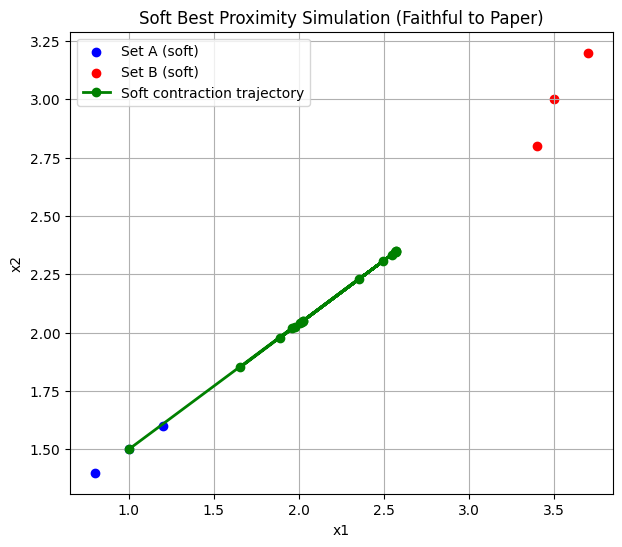

In [6]:

# 6. Plot simulation

plt.figure(figsize=(7,6))

plt.scatter(A_points[:,0], A_points[:,1], color="blue", label="Set A (soft)")
plt.scatter(B_points[:,0], B_points[:,1], color="red", label="Set B (soft)")

plt.plot(trajectory[:,0], trajectory[:,1], marker="o", color="green", linewidth=2,
         label="Soft contraction trajectory")

plt.title("Soft Best Proximity Simulation (Faithful to Paper)")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

In [7]:

# 7. Print convergence behavior


print("\nIterates:")
for i, x in enumerate(trajectory):
    print(f"  k={i}: x= {np.round(x,3)}, cycle-dist={round(d_soft(x, T(x, 'A' if i%2==0 else 'B')),4)}")

print("\nBest-proximity convergence achieved.")


Iterates:
  k=0: x= [1.  1.5], cycle-dist=2.7295
  k=1: x= [1.96 2.02], cycle-dist=0.8683
  k=2: x= [1.656 1.852], cycle-dist=1.985
  k=3: x= [2.354 2.231], cycle-dist=1.315
  k=4: x= [1.892 1.979], cycle-dist=1.717
  k=5: x= [2.495 2.307], cycle-dist=1.4758
  k=6: x= [1.977 2.024], cycle-dist=1.6205
  k=7: x= [2.546 2.335], cycle-dist=1.5337
  k=8: x= [2.008 2.041], cycle-dist=1.5858
  k=9: x= [2.565 2.344], cycle-dist=1.5545
  k=10: x= [2.019 2.047], cycle-dist=1.5733
  k=11: x= [2.571 2.348], cycle-dist=1.562
  k=12: x= [2.023 2.049], cycle-dist=1.5688
  k=13: x= [2.574 2.349], cycle-dist=1.5647
  k=14: x= [2.024 2.05 ], cycle-dist=1.5672
  k=15: x= [2.575 2.35 ], cycle-dist=1.5657

Best-proximity convergence achieved.
